In [1]:
pip install --upgrade scikit-learn threadpoolctl

  Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl (10.6 MB)
Using cached threadpoolctl-3.4.0-py3-none-any.whl (17 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# set workspace
WhoIsWorking = "AA"
WorkLocation = "School"

if WhoIsWorking == "RT":
    if WorkLocation == "Home":
        folder_path = r'C:\Users\rentr\Desktop\ENGO\DataMining\ENGO645_TermProject_Data'
    elif WorkLocation == "School":
        folder_path = r'D:\ENGO645_TermProject_Data'
elif WhoIsWorking == "AA":
    folder_path = r'C:\Users\achan\OneDrive\Desktop\Term Project Data'
elif WhoIsWorking == "IA":
    folder_path = r'C:\Users\afoam\assignments\ENGO645_TorontoCrimeAnalysis'
elif WhoIsWorking == "AI":
    folder_path = r'C:\Adewale_Directory\Capacity_Building\MGIS\Lecture_Note\WINTER2024\ENGO645\Course_Project\Project_Data'

print(folder_path)

C:\Users\achan\OneDrive\Desktop\Term Project Data


In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the data
neighbourhood_data = pd.read_csv(r"C:\Users\achan\OneDrive\Desktop\Term Project Data\Neighbourhood_Cleaned.csv")
crime_data = pd.read_csv(r"C:\Users\achan\OneDrive\Desktop\Term Project Data\MCI_Cleaned.csv")

# Merge the two datasets on the neighbourhood column
merged_data = pd.merge(neighbourhood_data, crime_data, left_on='NeighbourhoodName', right_on='NEIGHBOURHOOD_158')

# Select the columns to use for clustering
columns = ['Poles_Count', 'POI_Count', 'TCamera_Count', 'TotalPopulation', 'MedianTotalIncome', 'AverageTotalIncome', 'BuildingCoveragePERCENTAGE', 'ParksOSNAPERCENTAGE', 'BuiltUpPERCENTAGE', 'AveragePrice', 'OCC_YEAR', 'OCC_HOUR', 'TEMP']
data_for_clustering = merged_data[columns]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_for_clustering)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)
# Add the cluster labels to the original data
merged_data['Cluster'] = clusters

# Identify the high-risk areas
high_risk_areas = merged_data[merged_data['Cluster'] == merged_data['Cluster'].value_counts().idxmin()]

display(high_risk_areas)

,geometry,NeighbourhoodName,Poles_Count,POI_Count,TCamera_Count,TotalPopulation,MedianTotalIncome,AverageTotalIncome,BuildingCoveragePERCENTAGE,ParksOSNAPERCENTAGE,...,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,DATE_TIME_LINK,TIMECategory,TEMP,TEMPCategory,Cluster
101225,"POLYGON ((-79.3526822361769 43.655714324394, -...",St Lawrence-East Bayfront-The Islands,1968,1513,20,31285,58000,79700,5.626073,31.284177,...,Robbery - Other,Robbery,St Lawrence-East Bayfront-The Islands,-79.368457,43.648776,2023/1/1 1,Night,4.5,Mild,2
101226,"POLYGON ((-79.3526822361769 43.655714324394, -...",St Lawrence-East Bayfront-The Islands,1968,1513,20,31285,58000,79700,5.626073,31.284177,...,Assault,Assault,St Lawrence-East Bayfront-The Islands,-79.379088,43.645917,2023/1/1 8,Morning,4.2,Mild,2
101227,"POLYGON ((-79.3526822361769 43.655714324394, -...",St Lawrence-East Bayfront-The Islands,1968,1513,20,31285,58000,79700,5.626073,31.284177,...,Assault,Assault,St Lawrence-East Bayfront-The Islands,-79.379088,43.645917,2023/1/1 8,Morning,4.2,Mild,2
101228,"POLYGON ((-79.3526822361769 43.655714324394, -...",St Lawrence-East Bayfront-The Islands,1968,1513,20,31285,58000,79700,5.626073,31.284177,...,B&E,Break and Enter,St Lawrence-East Bayfront-The Islands,-79.357357,43.651340,2023/1/1 20,Evening,4.0,Mild,2
101229,"POLYGON ((-79.3526822361769 43.655714324394, -...",St Lawrence-East Bayfront-The Islands,1968,1513,20,31285,58000,79700,5.626073,31.284177,...,Assault,Assault,St Lawrence-East Bayfront-The Islands,-79.373776,43.648437,2023/1/3 20,Evening,3.7,Mild,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264385,"POLYGON ((-79.3452871691637 43.7528896509851, ...",Banbury-Don Mills,3266,1670,6,27155,46400,77800,15.576397,17.956461,...,B&E W'Intent,Break and Enter,Banbury-Don Mills,-79.327552,43.726641,2014/12/18 14,Afternoon,0.3,Mild,2
264386,"POLYGON ((-79.3452871691637 43.7528896509851, ...",Banbury-Don Mills,3266,1670,6,27155,46400,77800,15.576397,17.956461,...,B&E W'Intent,Break and Enter,Banbury-Don Mills,-79.327552,43.726641,2014/12/22 16,Afternoon,1.1,Mild,2
264387,"POLYGON ((-79.3452871691637 43.7528896509851, ...",Banbury-Don Mills,3266,1670,6,27155,46400,77800,15.576397,17.956461,...,B&E,Break and Enter,Banbury-Don Mills,-79.350149,43.719590,2014/12/23 12,Afternoon,4.7,Mild,2
264388,"POLYGON ((-79.3452871691637 43.7528896509851, ...",Banbury-Don Mills,3266,1670,6,27155,46400,77800,15.576397,17.956461,...,B&E,Break and Enter,Banbury-Don Mills,-79.327552,43.726641,2014/12/28 6,Morning,2.9,Mild,2


In [10]:
import os
from sklearn.cluster import KMeans
# Set the OMP_NUM_THREADS environment variable to 1
os.environ['OMP_NUM_THREADS'] = '1'

n_clusters = 20  # Sample random number for the number of clusters (e.g. 5)
init_method = 'k-means++'  # Initialization method for centroids (one of k-means++ or random)
max_iter = 300  # Maximum number of iterations for each run (e.g. 300)
n_init = 10  # Number of times the K-Means algorithm will be run with different centroid seeds (e.g. 10)
random_state = 0  # Random seed for reproducibility (e.g. 0)
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, init=init_method, max_iter=max_iter, n_init=n_init, random_state=random_state)
high_risk_areas['cluster'] = kmeans.fit_predict(high_risk_areas[['latitude', 'longitude']])

# Retrieve Cluster Centers
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

KeyError: "None of [Index(['latitude', 'longitude'], dtype='object')] are in the [columns]"

NameError: name 'init_method' is not defined

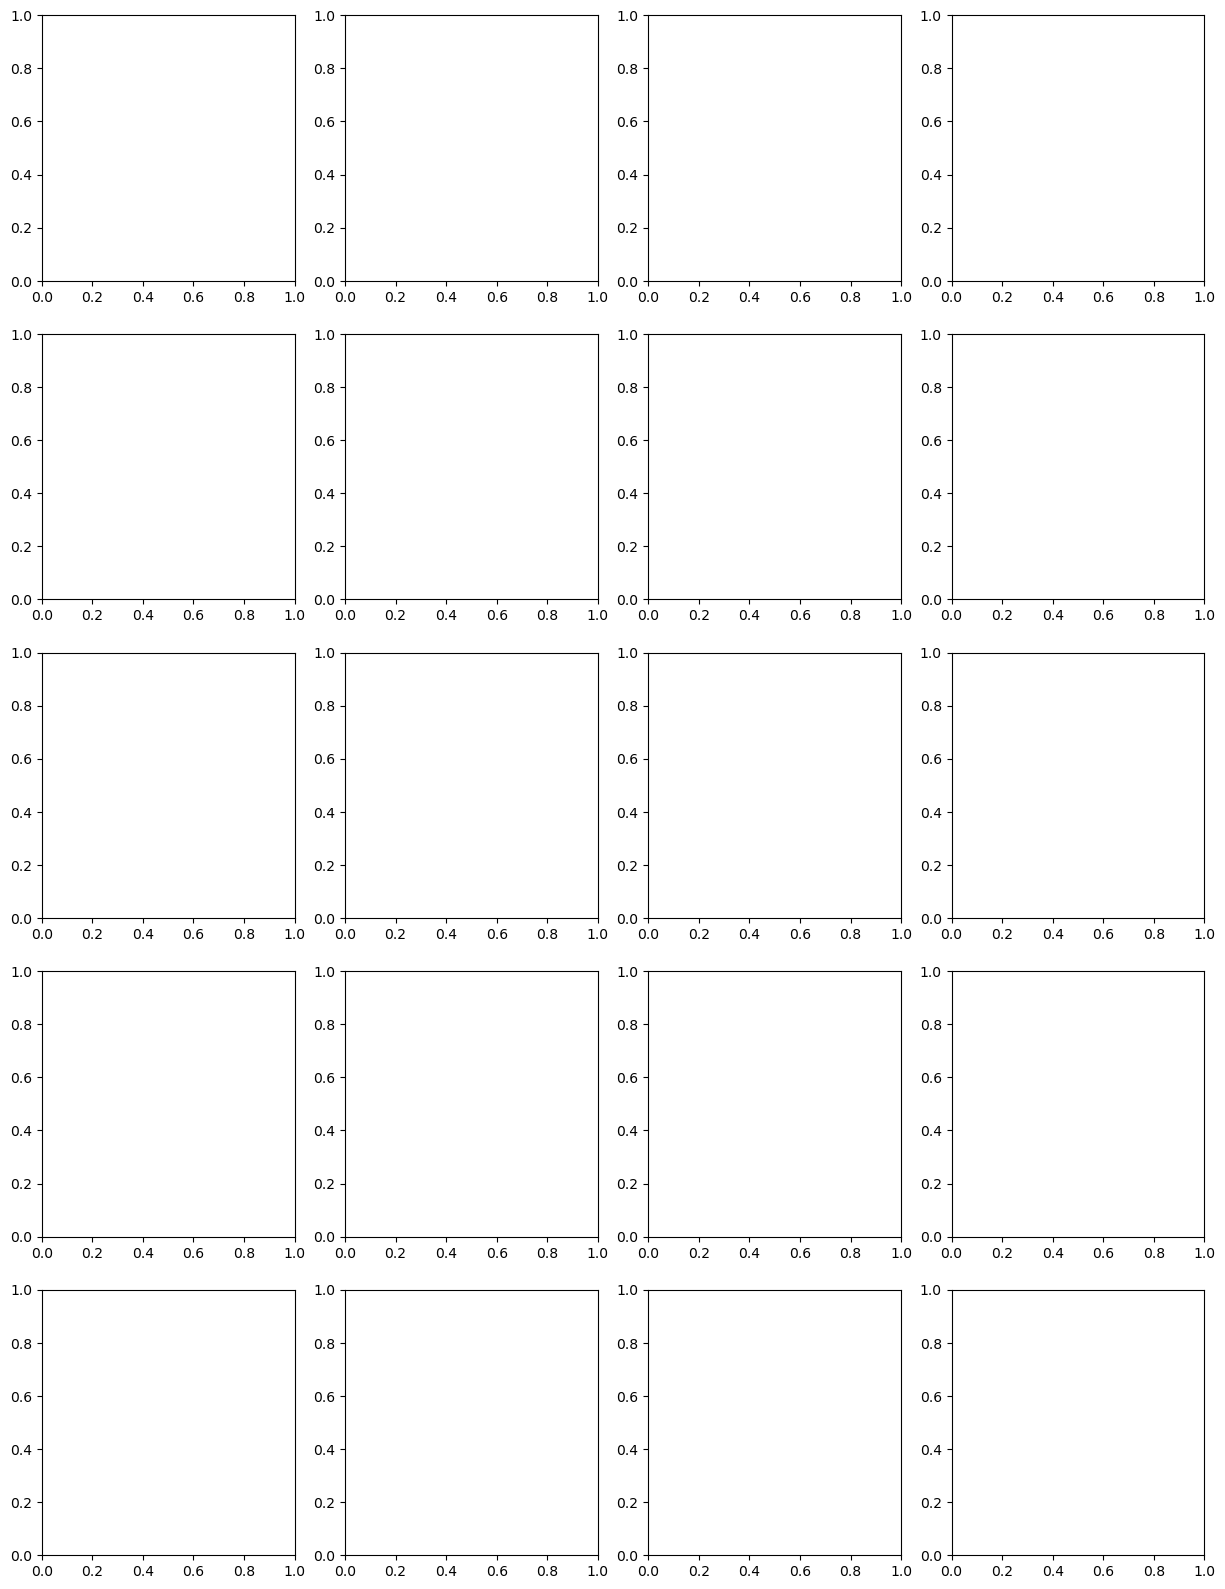

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Specify the range of cluster numbers to iterate over
n_clusters_range = range(1, 21)  # For example from 2 to 20

fig, axs = plt.subplots(5, 4, figsize=(15, 20))  # Create a 5x4 grid of subplots

# Use the for loop to iterate over the different numbers of clusters
for ax, n_clusters in zip(axs.flatten(), n_clusters_range):
    # Initialize the K-Means clustering algorithm with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, init=init_method, max_iter=max_iter, n_init=n_init, random_state=random_state)
    
    # Fit the algorithm to the dataset and obtain cluster labels
    cluster_labels = kmeans.fit_predict(high_risk_areas[['latitude', 'longitude']])
    
    # Retrieve the cluster centers
    cluster_centers = kmeans.cluster_centers_
    
    # Plot data points with assigned cluster labels using different colors on the current subplot
    ax.scatter(high_risk_areas['latitude'], high_risk_areas['longitude'], c=cluster_labels, cmap='viridis', s=10)
    
    # Plot cluster centers (centroids) on the current subplot
    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=50, c='red')
    
    # Set plot title and labels
    ax.set_title(f'{n_clusters} Clusters')
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    # Add grid lines for readability
    ax.grid(True)
plt.tight_layout()
plt.show()

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_clusters=2)
reduced_data = pca.fit_transform(data_scaled)

# Create a scatter plot of the reduced data
plt.figure(figsize=(10, 10))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=merged_data['Cluster'])

# Highlight the high-risk areas
high_risk_areas_reduced = pca.transform(scaler.transform(imputer.transform(high_risk_areas[columns])))
plt.scatter(high_risk_areas_reduced[:, 0], high_risk_areas_reduced[:, 1], c='red')

plt.show()

TypeError: PCA.__init__() got an unexpected keyword argument 'n_clusters'

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data
neighbourhood_data = pd.read_csv(r"C:\Users\achan\OneDrive\Desktop\Term Project Data\Neighbourhood_Cleaned.csv")
crime_data = pd.read_csv(r"C:\Users\achan\OneDrive\Desktop\Term Project Data\MCI_Cleaned.csv")

# Select relevant features for clustering
features_neighbourhood = neighbourhood_data[['Poles_Count', 'POI_Count', 'TCamera_Count', 'TotalPopulation', 
                                             'MedianTotalIncome', 'AverageTotalIncome', 'BuildingCoveragePERCENTAGE', 
                                             'ParksOSNAPERCENTAGE', 'BuiltUpPERCENTAGE', 'AveragePrice']]

# Drop rows with missing values
features_neighbourhood.dropna(inplace=True)

# Normalize features
scaler = StandardScaler()
scaled_features_neighbourhood = scaler.fit_transform(features_neighbourhood)

# Perform k-means clustering
k = 5  # Number of clusters
kmeans_neighbourhood = KMeans(n_clusters=k, random_state=42)
clusters_neighbourhood = kmeans_neighbourhood.fit_predict(scaled_features_neighbourhood)

# Add cluster labels to the neighbourhood data
neighbourhood_data['Cluster'] = clusters_neighbourhood

# Select relevant features for crime data
features_crime = crime_data[['NEIGHBOURHOOD_158', 'LAT_WGS84', 'LONG_WGS84']]

# Group crime data by neighbourhood and count the number of crimes
crime_counts = features_crime.groupby('NEIGHBOURHOOD_158').size().reset_index(name='Crime_Count')

# Merge crime counts with neighbourhood data
neighbourhood_data = neighbourhood_data.merge(crime_counts, on='NEIGHBOURHOOD_158', how='left')

# Output clusters and crime counts for high-risk areas
high_risk_areas = neighbourhood_data[['NeighbourhoodName', 'Cluster', 'Crime_Count']]
high_risk_areas.to_csv("High_Risk_Areas.csv", index=False)

C:\Users\achan\AppData\Local\Temp\ipykernel_6912\2149622241.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_neighbourhood.dropna(inplace=True)
C:\Users\achan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KeyError: 'NEIGHBOURHOOD_158'